# SMDT Pitch: Generate .wav files composed of sine waves

From the [SMDT original article](https://www.sciencedirect.com/science/article/pii/S0191886914000841):
> In the Pitch sub-test, stimuli consisted of sine tones. Each tone had total duration of 590 ms and started with a 30 ms ramp from 0 dB followed by 530 ms steady state and ending with a 30 ms ramp down to 0 dB. The frequency of one of the stimulus tones in an item was always 500 Hz. The frequency of the other tone varied in the range 501–517 Hz. The order of the two tones varied randomly so that the standard tone (500 Hz) was presented first in some items and last in the others. The two tones in an item were separated by 1 s of silence. 

Note that the article doesn't describe what the actual volume (e. g. during steady state) that the sounds ramped up to was. It's possible that this wasn't really specified, since the test was to be possible to do online, from participants' homes.

When putting together this Jupyter notebook, I used [this blog post](https://thehackerdiary.wordpress.com/2017/06/09/it-is-ridiculously-easy-to-generate-any-audio-signal-using-python/), [this Reddit thread](https://old.reddit.com/r/Python/comments/6g9ccc/it_is_ridiculously_easy_to_generate_any_audio/) and [this other blog post](https://soledadpenades.com/posts/2009/fastest-way-to-generate-wav-files-in-python-using-the-wave-module/).

## Imports

In [1]:
import struct
import wave
import numpy as np
import pandas as pd
import os

## General setup

In [2]:
sampling_rate = 44100
freq_first_sound = 550
freq_second_sound = 500
max_amplitude = 100
save_dir_path = '/Users/workingman/Desktop'
save_file_path = os.path.join(save_dir_path, f'smdtpitch_{freq_first_sound}_{freq_second_sound}.wav')

## First sound

### First section of first sound

> started with a 30 ms ramp from 0 dB

In [3]:
samples1_1 = int(sampling_rate * 3/100)
x1_1 = np.arange(samples1_1)
amp1_1 = np.linspace(0, max_amplitude, samples1_1) # amplitude (ascending)

In [4]:
y1_1 = amp1_1*np.sin(2 * np.pi * freq_first_sound * x1_1 / sampling_rate)

### Second section of first sound

> followed by 530 ms steady state

In [5]:
samples1_2 = int(sampling_rate * 53/100)
x1_2 = np.arange(samples1_2)
amp1_2 = max_amplitude

In [6]:
y1_2 = amp1_2*np.sin(2 * np.pi * freq_first_sound * x1_2 / sampling_rate)

### Third section of first sound

> ending with a 30 ms ramp down to 0 dB

In [7]:
samples1_3 = int(sampling_rate * 3/100)
x1_3 = np.arange(samples1_3)
amp1_3 = np.linspace(max_amplitude, 0, samples1_3) # amplitude (descending)

In [8]:
y1_3 = amp1_3*np.sin(2 * np.pi * freq_first_sound * x1_3 / sampling_rate)

In [9]:
y1_3.shape

(1323,)

## Inbetween sounds pause

> The two tones in an item were separated by 1 s of silence.

In [10]:
samples_pause = int(sampling_rate * 1)
x_pause = np.arange(samples_pause)
amp_pause = 0

In [11]:
y_pause = amp_pause*np.sin(2 * np.pi * freq_first_sound * x_pause / sampling_rate)

## Second sound

### First section of second sound

> started with a 30 ms ramp from 0 dB

In [12]:
samples2_1 = int(sampling_rate * 3/100)
x2_1 = np.arange(samples2_1)
amp2_1 = np.linspace(0, max_amplitude, samples2_1) # amplitude (ascending)

In [13]:
y2_1 = amp2_1*np.sin(2 * np.pi * freq_second_sound * x2_1 / sampling_rate)

### Second section of second sound

> followed by 530 ms steady state

In [14]:
samples2_2 = int(sampling_rate * 53/100)
x2_2 = np.arange(samples2_2)
amp2_2 = max_amplitude

In [15]:
y2_2 = amp2_2*np.sin(2 * np.pi * freq_second_sound * x2_2 / sampling_rate)

### Third section of second sound

> ending with a 30 ms ramp down to 0 dB

In [16]:
samples2_3 = int(sampling_rate * 3/100)
x2_3 = np.arange(samples2_3)
amp2_3 = np.linspace(max_amplitude, 0, samples2_3) # amplitude (descending)

In [17]:
y2_3 = amp2_3*np.sin(2 * np.pi * freq_second_sound * x2_3 / sampling_rate)

In [18]:
y2_3.shape

(1323,)

## Merge sections to produce one single sequence

In [19]:
y = np.concatenate((y1_1, y1_2, y1_3, y_pause, y2_1, y2_2, y2_3), axis=0)

## Make a rough visualization of the sequence

In [20]:
df = pd.DataFrame({'y':y})

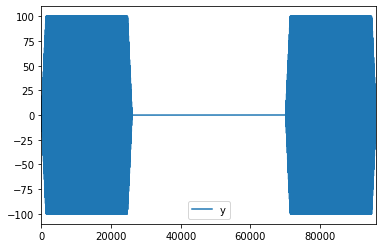

In [21]:
df.plot(y='y')

## Write to file

The wave package is used here. For a description of how the `.setparams` method works, see the [source code](https://old.reddit.com/r/Python/comments/6g9ccc/it_is_ridiculously_easy_to_generate_any_audio/) for wave, around lines 284 and 393. The tuple passed to the method contains these specifications (in order):

* nchannels: The number of channels (mono/stereo)
* sampwidth: The sample width, the number of bytes per audio sample. 2 bytes (16 bits) is standard for the WAV format.
* framerate: The sampling frequency (44,1 kHz is default AFAIK)
* nframes: "the number of audio frames written to the header" - I don't know what this is really.
* comptype: "the AIFF-C compression type ('NONE' in AIFF)" - I don't know much about this either. We don't use compression here, because we want the sound to be loaded as quickly as possible.
* compname: "the human-readable AIFF-C compression type" - Labels the compression type. 


In [26]:
# noise_output = wave.open(save_file_path, 'w')
# noise_output.setparams((2, 2, 44100, 0, 'NONE', 'not compressed'))
# values = [struct.pack('h', int(value)) for value in y]
# value_flat = b''.join(values)
# noise_output.writeframes(value_flat)
# noise_output.close()

f = open(save_file_path, 'wb')
for i in y:
    f.write(struct.pack('b', int(i)))
f.close()
